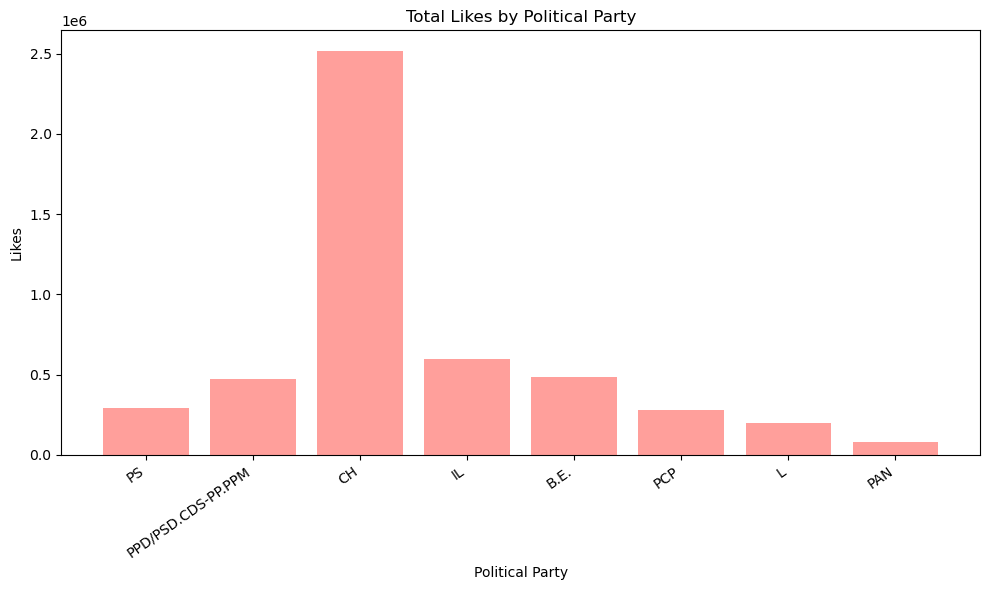

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

total_likes_all_parties_df = pd.read_csv('total_likes_all_parties.csv')

pastel_color = sns.color_palette('pastel')[3]

# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(total_likes_all_parties_df['Political Party'], total_likes_all_parties_df['Total Likes'], color=pastel_color)
plt.xlabel('Political Party')
plt.ylabel('Likes')
plt.title('Total Likes by Political Party')
plt.xticks(rotation=35, ha='right')
plt.tight_layout() 
plt.show()

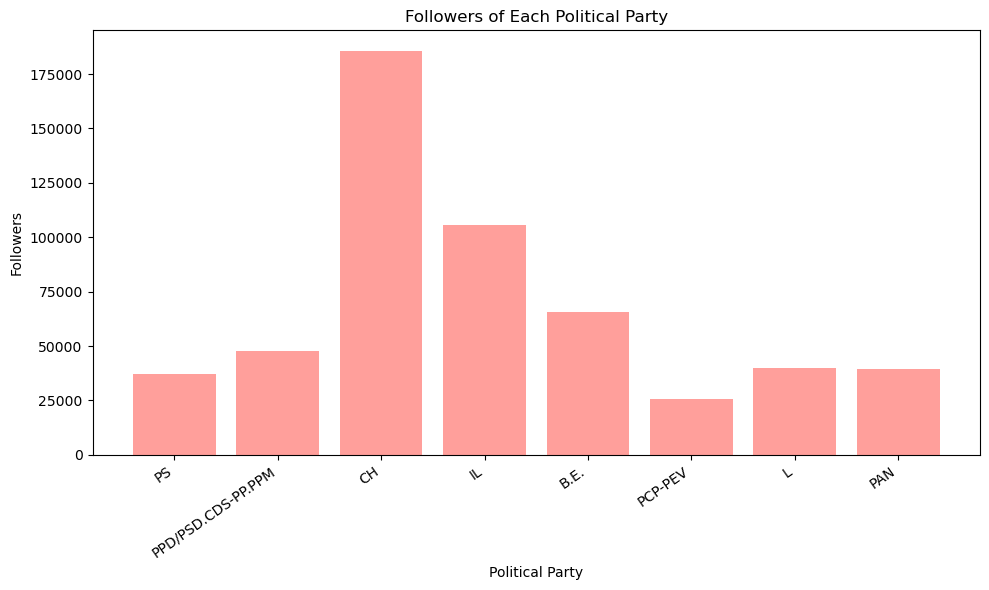

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

followers_all_parties_df = pd.read_csv('parties_followers_count.csv')

# Define a pastel color from the palette
pastel_color = sns.color_palette('pastel')[3]

# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(followers_all_parties_df['Political Party'], followers_all_parties_df['Followers'], color=pastel_color)
plt.xlabel('Political Party')
plt.ylabel('Followers')
plt.title('Followers of Each Political Party')
plt.xticks(rotation=35, ha='right')
plt.tight_layout() 
plt.show()

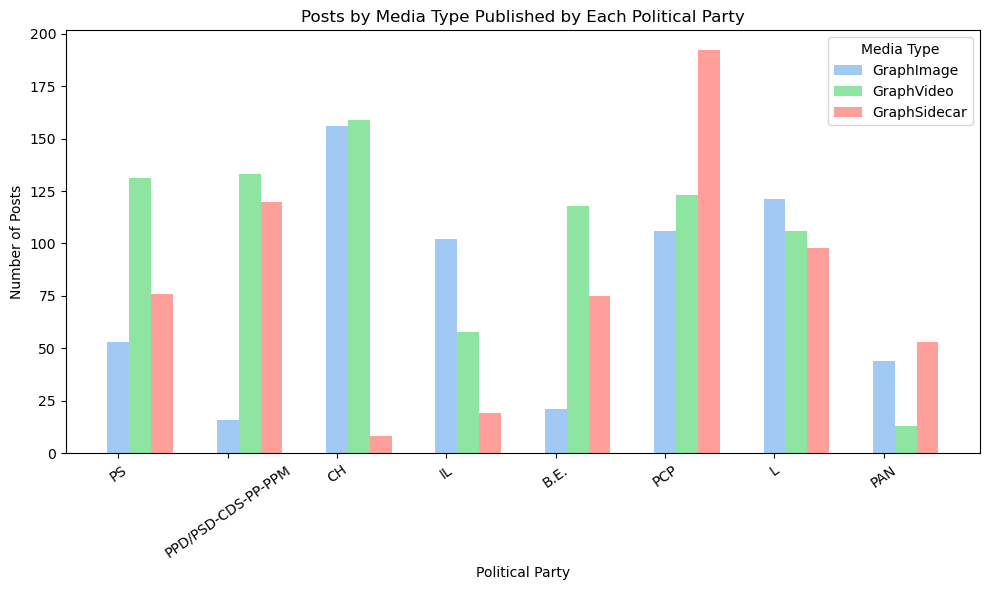

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('all_parties_media_types.csv')

# Group by Political Party and Media Type, count occurrences, and unstack
grouped = df.groupby(['Political Party', 'Media Type']).size().unstack(fill_value=0)

# Define the order of the parties
party_order = ['PS', 'PPD/PSD-CDS-PP-PPM', 'CH', 'IL', 'B.E.', 'PCP', 'L', 'PAN']

# Reorder the rows based on the specified order
grouped = grouped.loc[party_order]

# Set the color palette
sns.set_palette('pastel')

# Define pastel colors from the palette
pastel_colors = [sns.color_palette('pastel')[0], sns.color_palette('pastel')[2], sns.color_palette('pastel')[3]]

# Plotting
plt.figure(figsize=(10, 6))

# Get the unique media types
media_types = df['Media Type'].unique()

# Set the width of the bars
bar_width = 0.2

# Set the index for the bars
index = range(len(grouped))

# Plot each media type for each party with a different color
for i, media_type in enumerate(media_types):
    plt.bar([p + bar_width * i for p in index], grouped[media_type], bar_width, label=media_type, color=pastel_colors[i])

# Set the labels and title
plt.xlabel('Political Party')
plt.ylabel('Number of Posts')
plt.title('Posts by Media Type Published by Each Political Party')
plt.xticks(index, grouped.index, rotation=35)
plt.legend(title='Media Type')
plt.tight_layout()
plt.show()

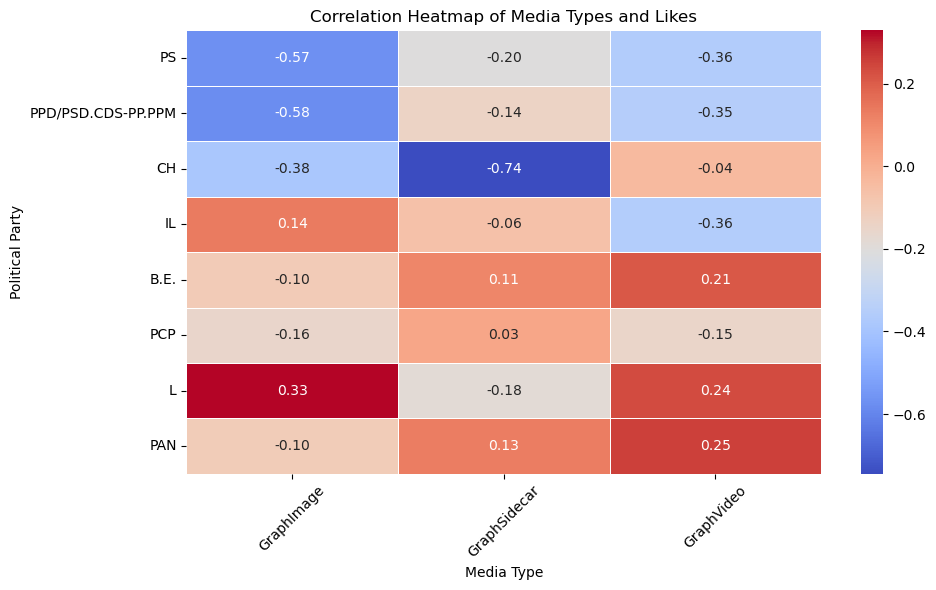

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

all_parties_media_types_df = pd.read_csv('all_parties_media_types_with_post_number.csv')
all_parties_likes_df = pd.read_csv('all_parties_likes.csv')

# Merge media types and likes dataframes on 'Political Party' and 'Post Number'
merged_df = pd.merge(all_parties_media_types_df, all_parties_likes_df, on=['Political Party', 'Post Number'])

# Define the order of political parties
party_order = ['PS', 'PPD/PSD.CDS-PP.PPM', 'CH', 'IL', 'B.E.', 'PCP', 'L', 'PAN']

# Calculate correlation coefficients between media types and likes
correlation_matrix = merged_df.groupby(['Media Type', 'Political Party'])['Likes'].corr(other=merged_df['Post Number'])

# Unstack the correlation matrix with ordered parties
correlation_matrix_unstacked = correlation_matrix.unstack(level=0).reindex(party_order)

# Plot correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_unstacked, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Correlation Heatmap of Media Types and Likes')
plt.xlabel('Media Type')
plt.ylabel('Political Party')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [16]:
# Calculate the average correlation coefficient for each party
average_correlation = correlation_matrix_unstacked.mean(axis=1)

print("Average Correlation Coefficients for Each Political Party:")
print(average_correlation)

Average Correlation Coefficients for Each Political Party:
Political Party
PS                   -0.377571
PPD/PSD.CDS-PP.PPM   -0.355677
CH                   -0.389016
IL                   -0.095445
B.E.                  0.074353
PCP                  -0.094098
L                     0.127223
PAN                   0.094087
dtype: float64


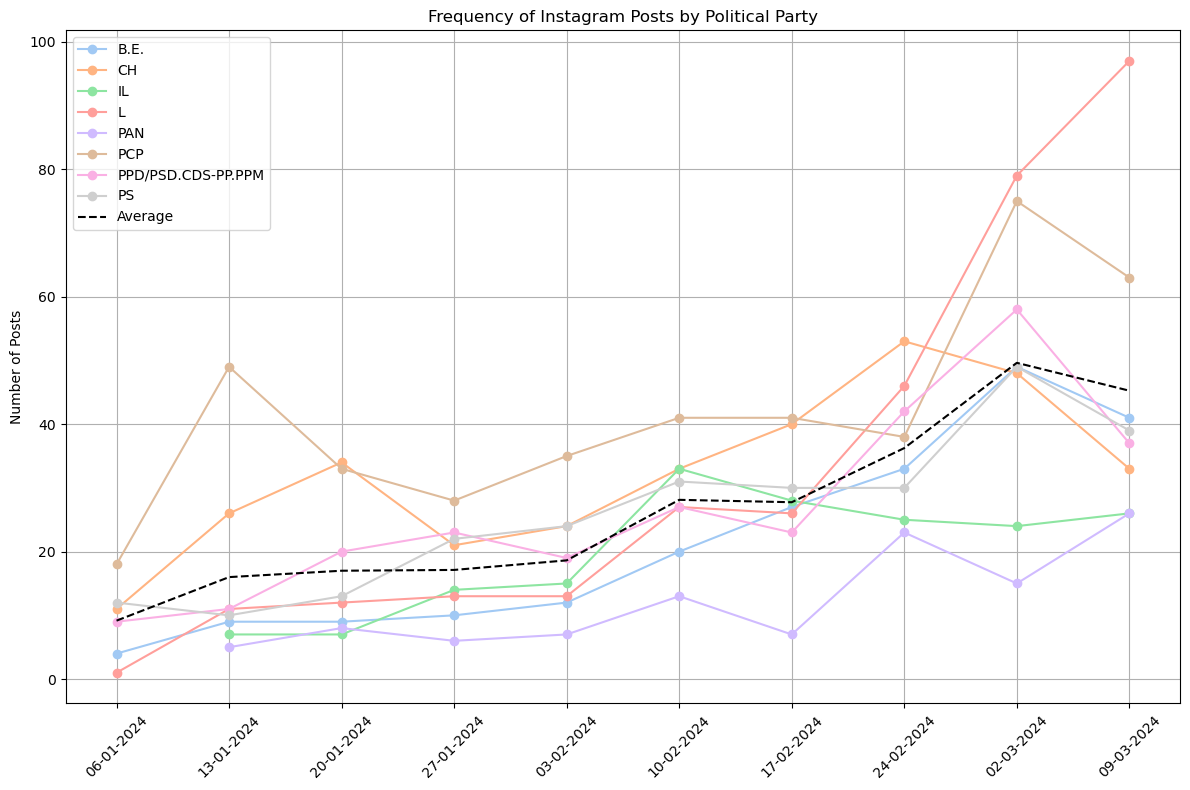

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

frequency_df = pd.read_csv('frequency_of_the_instagram_posts.csv')

# Convert 'Post Date' column to datetime
frequency_df['Post Date'] = pd.to_datetime(frequency_df['Post Date'])

# Set the start date and end date
start_date = pd.Timestamp(2024, 1, 6)
end_date = pd.Timestamp(2024, 3, 9)

# Resample the data by week starting on January 6th and ending on March 9th for each party
weekly_counts = frequency_df[frequency_df['Post Date'].between(start_date, end_date)].groupby(['Political Party', pd.Grouper(key='Post Date', freq='W-Mon')]).size().unstack(level=0)

# Calculate the average number of posts made for each party
average_posts = weekly_counts.mean(axis=1)

# Plot each party separately
plt.figure(figsize=(12, 8))
for party in weekly_counts.columns:
    plt.plot(weekly_counts.index, weekly_counts[party], marker='o', label=party)

# Plot the average number of posts made
plt.plot(average_posts.index, average_posts, linestyle='--', color='black', label='Average')

# Define the x-axis ticks with the exact dates
xticks = ['06-01-2024', '13-01-2024', '20-01-2024', '27-01-2024', '03-02-2024', '10-02-2024', '17-02-2024', '24-02-2024', '02-03-2024', '09-03-2024']
plt.xticks(ticks=weekly_counts.index, labels=xticks, rotation=45)

plt.title('Frequency of Instagram Posts by Political Party')
plt.ylabel('Number of Posts')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

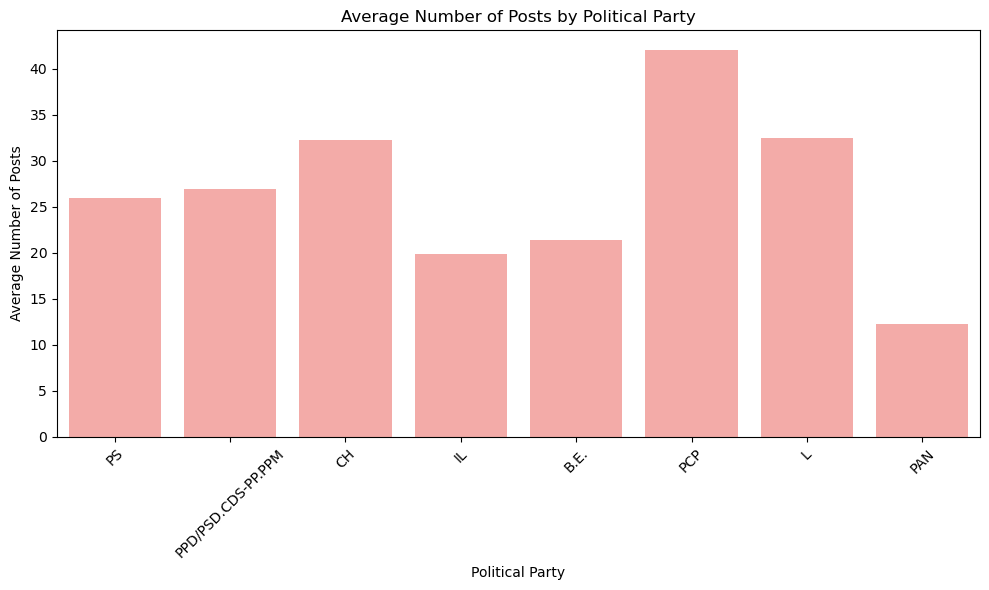

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the order of the parties
party_order = ['PS', 'PPD/PSD.CDS-PP.PPM', 'CH', 'IL', 'B.E.', 'PCP', 'L', 'PAN']

# Calculate the average number of posts made for each party
average_posts = weekly_counts.mean(axis=0)

# Convert the series to a dataframe
average_posts_df = average_posts.to_frame().reset_index()

# Rename the columns
average_posts_df.columns = ['Political Party', 'Average Posts']

pastel_color = sns.color_palette('pastel')[3]

plt.figure(figsize=(10, 6))
sns.barplot(data=average_posts_df, x='Political Party', y='Average Posts', color=pastel_color, order=party_order)
plt.title('Average Number of Posts by Political Party')
plt.xlabel('Political Party')
plt.ylabel('Average Number of Posts')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [57]:
average_posts_df

,Political Party,Average Posts
0,B.E.,21.400000
1,CH,32.300000
2,IL,19.888889
3,L,32.500000
4,PAN,12.222222
5,PCP,42.100000
6,PPD/PSD.CDS-PP.PPM,26.900000
7,PS,26.000000
